In [1]:
from codes.network import generate_network
from codes.simulations import diffuse_behavior

In [2]:
import imp
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
from pprint import pprint

In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

# Get full graph

In [4]:
G_all = generate_network(level_f='./', label='all')
G_gen = generate_network(level_f='./', label='gen')
G_friend = generate_network(level_f='./', label='friend')

Create connections...
Nodes after connections: # 906
Edges created #:  9154

Create agents...
PA
gender
age
class
bmi
height
weight
Removing nodes not in the specified classes...
Nodes removed for not being in the selected classes: # 455
Nodes removed for not having data for BMI: # 16
Nodes remaining after removal: # 435
Edges remaining after removal #:  5744
###############################################################
Graph generated successfuly!
###############################################################

Create connections...
Nodes after connections: # 905
Edges created #:  8304

Create agents...
PA
gender
age
class
bmi
height
weight
Removing nodes not in the specified classes...
Nodes removed for not being in the selected classes: # 454
Nodes removed for not having data for BMI: # 16
Nodes remaining after removal: # 435
Edges remaining after removal #:  5245
###############################################################
Graph generated successfuly!
#########################

In [5]:
# Returs a COPY of the subgraphs
#graphs_no_intervention = sorted(nx.weakly_connected_component_subgraphs(G), key=len, reverse=True)
#graphs_random = sorted(nx.weakly_connected_component_subgraphs(G), key=len, reverse=True)
#graphs_centrality = sorted(nx.weakly_connected_component_subgraphs(G), key=len, reverse=True)
#graphs_high_risk = sorted(nx.weakly_connected_component_subgraphs(G), key=len, reverse=True)

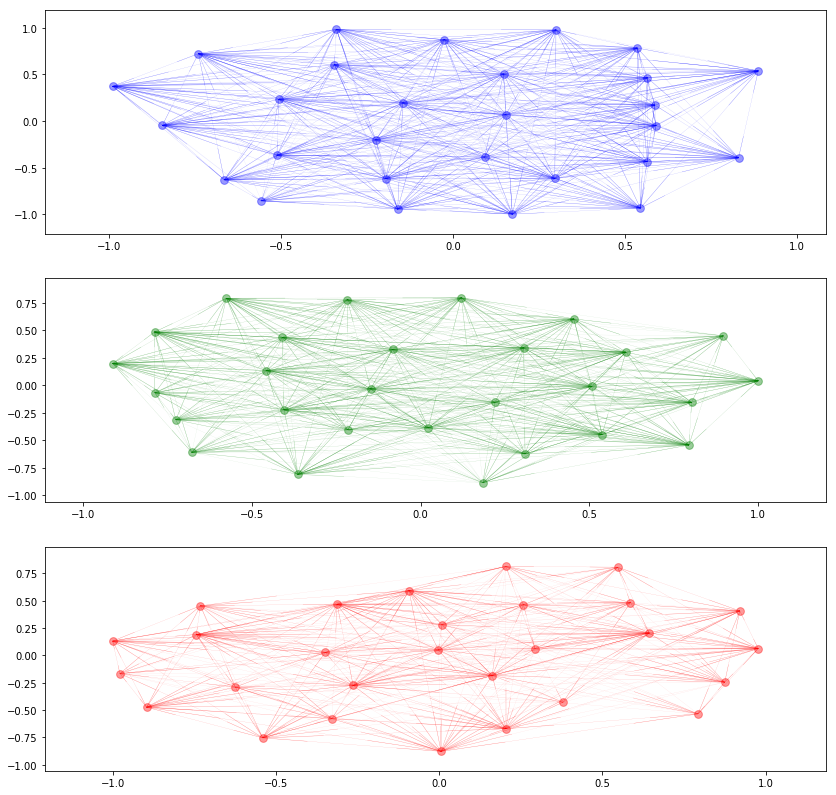

In [6]:
G0_all = sorted(nx.weakly_connected_component_subgraphs(G_all), key=len, reverse=True)[0]
G0_gen = sorted(nx.weakly_connected_component_subgraphs(G_gen), key=len, reverse=True)[0]
G0_friend = sorted(nx.weakly_connected_component_subgraphs(G_friend), key=len, reverse=True)[0]

graph_layout = 'spring'

if graph_layout == 'spring':
    graph_pos_all=nx.spring_layout(G0_all)
    graph_pos_gen=nx.spring_layout(G0_gen)
    graph_pos_friend=nx.spring_layout(G0_friend)
elif graph_layout == 'spectral':
    graph_pos_all=nx.spectral_layout(G0_all)
    graph_pos_gen=nx.spectral_layout(G0_gen)
    graph_pos_friend=nx.spectral_layout(G0_friend)
elif graph_layout == 'random':
    graph_pos_all=nx.random_layout(G0_all)
    graph_pos_gen=nx.random_layout(G0_gen)
    graph_pos_friend=nx.random_layout(G0_friend)
else:
    graph_pos_all=nx.shell_layout(G0_all)
    graph_pos_gen=nx.shell_layout(G0_gen)
    graph_pos_friend=nx.shell_layout(G0_friend)

node_color = 'blue'
node_size = 60
node_alpha = 0.4
node_text_size=6
edge_color='blue'
edge_alpha=0.3
edge_tickness=0.1
edge_text_pos=0.3
text_font='sans-serif'

plt.figure(figsize=((14,14)))

plt.subplot(311)
nx.draw_networkx_nodes(G0_all,graph_pos_all,node_size=node_size, alpha=node_alpha, node_color='blue')
nx.draw_networkx_edges(G0_all,graph_pos_all,width=edge_tickness, alpha=edge_alpha,edge_color='blue')
#nx.draw_networkx_labels(G0, graph_pos,font_size=node_text_size, font_family=text_font)
#nx.draw(G0_all,pos=graph_pos_all)


plt.subplot(312)
nx.draw_networkx_nodes(G0_gen,graph_pos_gen,node_size=node_size, alpha=node_alpha, node_color='green', with_labels=False)
nx.draw_networkx_edges(G0_gen,graph_pos_gen,width=edge_tickness, alpha=edge_alpha,edge_color='green')
#nx.draw_networkx_labels(G0, graph_pos,font_size=node_text_size, font_family=text_font)
#nx.draw(G0_gen,pos=graph_pos_gen)


plt.subplot(313)
nx.draw_networkx_nodes(G0_friend,graph_pos_friend,node_size=node_size, alpha=node_alpha, node_color='red')
nx.draw_networkx_edges(G0_friend,graph_pos_friend,width=edge_tickness, alpha=edge_alpha,edge_color='red')
#nx.draw_networkx_labels(G0, graph_pos,font_size=node_text_size, font_family=text_font)
#nx.draw(G0_friend,pos=graph_pos_friend)

# Evaluate all components

### Smaller cluster

In [11]:
interventions_list = ['vulnerable', None, 'random', 'centrality', 'high_risk', 'max-influence']
#interventions_list = ['max-influence', None]
factor='PA'
objective='all'
BW_df = pd.DataFrame()
BMI_df = pd.DataFrame()

for intervention in interventions_list:
    BW_dict = {}
    BMI_dict = {}
    graph = sorted(nx.weakly_connected_component_subgraphs(G_all), key=len, reverse=True)[0]

    diffuse_behavior(graph=graph, intervention=intervention, factor=factor, objective=objective, years=2)
    results_dict = dict(graph.nodes(data=True))
    for k, v in results_dict.items():
        BW_dict[k] = results_dict[k]['BW_hist']
    for k, v in results_dict.items():
        BMI_dict[k] = results_dict[k]['BMI_hist']
    
    # Create label for no intervention
    intervention_label = 'No intervention' if intervention is None else intervention
    BW_df[intervention_label] = pd.DataFrame(BW_dict).T.mean()
    BMI_df[intervention_label] = pd.DataFrame(BMI_dict).T.mean()

Intervention started:  vulnerable
Cluster contains 28 nodes and 717 edges!
Simulation without interventions.
Cluster contains 28 nodes and 717 edges!
Intervention started:  random
Cluster contains 28 nodes and 717 edges!
Intervention started:  centrality
Cluster contains 28 nodes and 717 edges!
Intervention started:  high_risk
Cluster contains 28 nodes and 717 edges!
Intervention started:  max-influence

#######################################
Max-influence started!
Objective function:  all
#######################################

This max-influence simulation is for a network with 28 nodes and 717 edges
Number of nodes to select:  3
Impact node #1346: 	obese: 0.0000 	overweight: -13.2563 	both: -13.2563 	all: -22.6357 
Impact node #1347: 	obese: 0.0000 	overweight: -14.9928 	both: -14.9928 	all: -20.2776 
Impact node #1348: 	obese: 0.0000 	overweight: 0.7247 	both: 0.7247 	all: -29.2731 
Impact node #1349: 	obese: 0.0000 	overweight: -5.1601 	both: -5.1601 	all: -27.5608 
Impact node 

(0, 729)

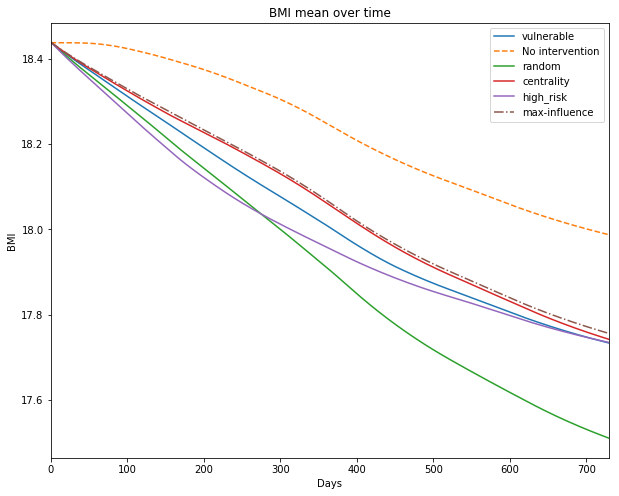

In [12]:
styles = {'vulnerable':'-', 'No intervention': '--', 'random': '-', 'centrality': '-', 'high_risk': '-', 
          'max-influence': '-.'}

#styles = ['b', 'r', 'g', 'y', 'b--']
BMI_df.plot(figsize=(10,8), style=styles)
plt.legend()
plt.title('BMI mean over time')
plt.xlabel('Days')
plt.ylabel('BMI')
#plt.ylim(19,20.25)
plt.xlim(0,729)

(0, 729)

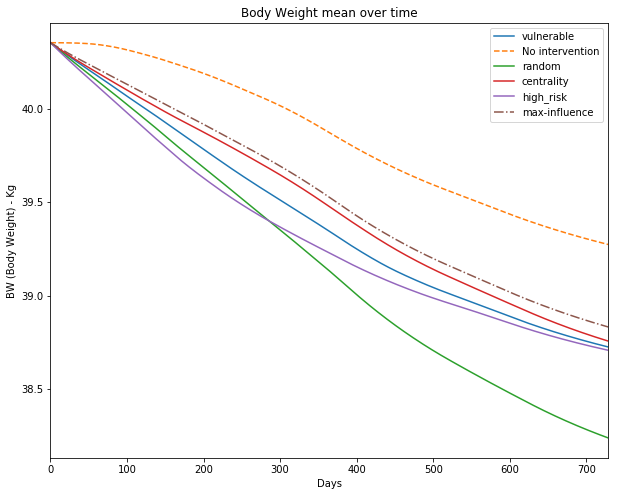

In [13]:
BW_df.plot(figsize=(10,8), style=styles)
plt.legend()
plt.title('Body Weight mean over time')
plt.xlabel('Days')
plt.ylabel('BW (Body Weight) - Kg')
#plt.ylim(46,48)
plt.xlim(0,729)

In [14]:
PA_dict = {}
EI_dict = {}
BW_dict = {}
graph = sorted(nx.weakly_connected_component_subgraphs(G), key=len, reverse=True)[0]

diffuse_behavior(graph=graph, intervention=None, years=2)
results_dict = dict(graph.nodes(data=True))
for k, v in results_dict.items():
    PA_dict[k] = results_dict[k]['PA_hist']
for k, v in results_dict.items():
    EI_dict[k] = results_dict[k]['EI_hist']
for k, v in results_dict.items():
    BW_dict[k] = results_dict[k]['BW_hist']
    

NameError: name 'G' is not defined

Text(0,0.5,'BW (Body Weight) - Kg')

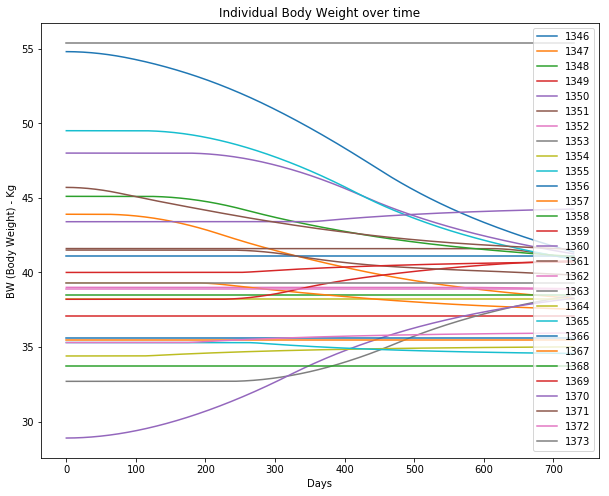

In [11]:
pd.DataFrame(BW_dict).plot(figsize=((10,8)))
plt.title('Individual Body Weight over time')
plt.xlabel('Days')
plt.ylabel('BW (Body Weight) - Kg')

#plt.legend().set_visible(False)

In [12]:
pd.DataFrame(BW_dict).head()

,1346,1347,1348,1349,1350,1351,1352,1353,1354,1355,...,1364,1365,1366,1367,1368,1369,1370,1371,1372,1373
0,54.800000,43.9,38.5,37.1,48.0,41.6,39.0,32.7,38.2,49.5,...,34.4,35.3,35.6,35.5,33.7,40.0,43.4,45.700000,35.3,39.3
1,54.799888,43.9,38.5,37.1,48.0,41.6,39.0,32.7,38.2,49.5,...,34.4,35.3,35.6,35.5,33.7,40.0,43.4,45.699858,35.3,39.3
2,54.799663,43.9,38.5,37.1,48.0,41.6,39.0,32.7,38.2,49.5,...,34.4,35.3,35.6,35.5,33.7,40.0,43.4,45.699576,35.3,39.3
3,54.799327,43.9,38.5,37.1,48.0,41.6,39.0,32.7,38.2,49.5,...,34.4,35.3,35.6,35.5,33.7,40.0,43.4,45.699152,35.3,39.3
4,54.798879,43.9,38.5,37.1,48.0,41.6,39.0,32.7,38.2,49.5,...,34.4,35.3,35.6,35.5,33.7,40.0,43.4,45.698588,35.3,39.3


In [13]:
pd.DataFrame(BW_dict).tail()

,1346,1347,1348,1349,1350,1351,1352,1353,1354,1355,...,1364,1365,1366,1367,1368,1369,1370,1371,1372,1373
725,41.424035,38.281205,38.5,37.1,41.277362,40.948565,38.908970,38.440381,38.2,40.921136,...,35.009538,34.568533,35.6,35.5,33.7,40.702708,44.244902,41.554344,35.941621,39.3
726,41.411285,38.277687,38.5,37.1,41.269678,40.941827,38.908284,38.448007,38.2,40.913300,...,35.009787,34.568033,35.6,35.5,33.7,40.703227,44.245822,41.552450,35.941945,39.3
727,41.398577,38.274181,38.5,37.1,41.262020,40.935113,38.907600,38.455605,38.2,40.905491,...,35.010036,34.567535,35.6,35.5,33.7,40.703745,44.246737,41.550564,35.942267,39.3
728,41.385911,38.270688,38.5,37.1,41.254388,40.928421,38.906919,38.463175,38.2,40.897711,...,35.010283,34.567040,35.6,35.5,33.7,40.704260,44.247649,41.548685,35.942588,39.3
729,41.373286,38.267207,38.5,37.1,41.246782,40.921751,38.906240,38.470718,38.2,40.889958,...,35.010529,34.566547,35.6,35.5,33.7,40.704774,44.248556,41.546812,35.942908,39.3


In [14]:
graph.nodes()

NodeView((1347, 1346, 1349, 1350, 1351, 1352, 1357, 1358, 1362, 1365, 1368, 1369, 1372, 1355, 1364, 1367, 1371, 1373, 1353, 1348, 1354, 1356, 1363, 1370, 1361, 1366, 1359, 1360))

### Full Graph

In [15]:
interventions_list = ['vulnerable', None, 'random', 'centrality', 'high_risk', 'max-influence']
#interventions_list = ['max-influence', None]
factor='PA'
objective='all'
BW_df = pd.DataFrame()
BMI_df = pd.DataFrame()

for intervention in interventions_list:
    BW_dict = {}
    BMI_dict = {}
    graphs = sorted(nx.weakly_connected_component_subgraphs(G), key=len, reverse=True)
    for i in range(len(graphs)):
        diffuse_behavior(graph=graphs[i], intervention=intervention, factor=factor, objective=objective, years=2)
        results_dict = dict(graphs[i].nodes(data=True))
        for k, v in results_dict.items():
            BW_dict[k] = results_dict[k]['BW_hist']
        for k, v in results_dict.items():
            BMI_dict[k] = results_dict[k]['BMI_hist']

    # Create label for no intervention
    intervention_label = 'No intervention' if intervention is None else intervention
    BW_df[intervention_label] = pd.DataFrame(BW_dict).T.mean()
    BMI_df[intervention_label] = pd.DataFrame(BMI_dict).T.mean()

Intervention started:  vulnerable
Cluster contains 28 nodes and 484 edges!
Intervention started:  vulnerable
Cluster contains 25 nodes and 183 edges!
Intervention started:  vulnerable
Cluster contains 21 nodes and 136 edges!
Intervention started:  vulnerable
Cluster contains 20 nodes and 112 edges!
Intervention started:  vulnerable
Cluster contains 20 nodes and 221 edges!
Intervention started:  vulnerable
Cluster contains 20 nodes and 162 edges!
Intervention started:  vulnerable
Cluster contains 19 nodes and 164 edges!
Intervention started:  vulnerable
Cluster contains 19 nodes and 132 edges!
Intervention started:  vulnerable
Cluster contains 18 nodes and 138 edges!
Intervention started:  vulnerable
Cluster contains 18 nodes and 163 edges!
Intervention started:  vulnerable
Cluster contains 18 nodes and 161 edges!
Intervention started:  vulnerable
Cluster contains 18 nodes and 152 edges!
Intervention started:  vulnerable
Cluster contains 18 nodes and 76 edges!
Intervention started:  vul

Intervention started:  high_risk
Cluster contains 18 nodes and 138 edges!
Intervention started:  high_risk
Cluster contains 18 nodes and 163 edges!
Intervention started:  high_risk
Cluster contains 18 nodes and 161 edges!
Intervention started:  high_risk
Cluster contains 18 nodes and 152 edges!
Intervention started:  high_risk
Cluster contains 18 nodes and 76 edges!
Intervention started:  high_risk
Cluster contains 18 nodes and 189 edges!
Intervention started:  high_risk
Cluster contains 17 nodes and 93 edges!
Intervention started:  high_risk
Cluster contains 17 nodes and 171 edges!
Intervention started:  high_risk
Cluster contains 16 nodes and 136 edges!
Intervention started:  high_risk
Cluster contains 15 nodes and 146 edges!
Intervention started:  high_risk
Cluster contains 14 nodes and 110 edges!
Intervention started:  high_risk
Cluster contains 13 nodes and 72 edges!
Intervention started:  high_risk
Cluster contains 12 nodes and 56 edges!
Intervention started:  high_risk
Cluster c

Impact node #1365: 	obese: 0.0000 	overweight: 2.1180 	both: 2.1180 	all: -35.8836 
Impact node #1366: 	obese: 0.0000 	overweight: 2.0420 	both: 2.0420 	all: -37.2264 
Impact node #1367: 	obese: -8.5395 	overweight: 10.6161 	both: 2.0766 	all: -36.9188 
Impact node #1368: 	obese: -8.5243 	overweight: 10.5174 	both: 1.9930 	all: -36.9336 
Impact node #1369: 	obese: 0.0000 	overweight: 1.9378 	both: 1.9378 	all: -36.5950 
Impact node #1370: 	obese: 0.0000 	overweight: 1.5740 	both: 1.5740 	all: -37.5286 
Impact node #1371: 	obese: -8.1762 	overweight: 12.2769 	both: 4.1007 	all: -29.2854 
Impact node #1372: 	obese: 0.0000 	overweight: 1.9157 	both: 1.9157 	all: -37.7069 
Impact node #1373: 	obese: -8.3689 	overweight: 10.4926 	both: 2.1237 	all: -36.9698 
Keys in order of impact:  [1372, 1370, 1351, 1366, 1373, 1368, 1367, 1350, 1362, 1349, 1369, 1348, 1361, 1356, 1365, 1354, 1355, 1359, 1352, 1357, 1363, 1358, 1353, 1347, 1346, 1371]
Node #3 selected: 1372 with an BW impact of -37.70694

Impact node #2711: 	obese: 9.2508 	overweight: 22.5758 	both: 31.8266 	all: 30.0783 
Impact node #2712: 	obese: 10.1153 	overweight: 25.6284 	both: 35.7437 	all: 34.6322 
Impact node #2713: 	obese: 10.0742 	overweight: 26.3643 	both: 36.4386 	all: 35.3271 
Impact node #2714: 	obese: 9.9391 	overweight: 19.0108 	both: 28.9499 	all: 28.7708 
Impact node #2715: 	obese: 9.9381 	overweight: 23.7767 	both: 33.7148 	all: 33.2757 
Impact node #2716: 	obese: 9.8053 	overweight: 22.8513 	both: 32.6566 	all: 31.5451 
Impact node #2717: 	obese: 5.4792 	overweight: 22.6180 	both: 28.0972 	all: 26.9857 
Impact node #2718: 	obese: 10.2326 	overweight: 23.3070 	both: 33.5396 	all: 32.5934 
Impact node #2719: 	obese: 10.0115 	overweight: 24.2156 	both: 34.2272 	all: 34.0919 
Impact node #2720: 	obese: 9.9620 	overweight: 22.8586 	both: 32.8206 	all: 31.9412 
Impact node #2722: 	obese: 10.0093 	overweight: 24.5148 	both: 34.5241 	all: 33.9492 
Impact node #2725: 	obese: 12.7198 	overweight: 23.3927 	bot

Impact node #1374: 	obese: -0.5311 	overweight: -1.8166 	both: -2.3477 	all: 2.5102 
Impact node #1375: 	obese: -0.7661 	overweight: -0.7059 	both: -1.4719 	all: 3.5990 
Impact node #1376: 	obese: -0.3381 	overweight: -0.0962 	both: -0.4343 	all: 6.8969 
Impact node #1377: 	obese: -0.5784 	overweight: -2.7600 	both: -3.3384 	all: 1.5483 
Impact node #1378: 	obese: -1.2434 	overweight: 0.2492 	both: -0.9942 	all: 6.2451 
Impact node #1379: 	obese: -0.6246 	overweight: -1.1232 	both: -1.7477 	all: 5.7635 
Impact node #1380: 	obese: -2.2161 	overweight: -0.6283 	both: -2.8444 	all: 2.2602 
Impact node #1381: 	obese: -0.1941 	overweight: 1.2427 	both: 1.0486 	all: 5.4076 
Impact node #1382: 	obese: 0.0000 	overweight: -1.9675 	both: -1.9675 	all: 2.2612 
Impact node #1383: 	obese: -0.0975 	overweight: -0.7628 	both: -0.8603 	all: 4.4718 
Impact node #1386: 	obese: -0.4841 	overweight: -0.6068 	both: -1.0909 	all: 4.1452 
Impact node #1389: 	obese: -1.0578 	overweight: -1.7992 	both: -2.857

Impact node #1281: 	obese: 16.8060 	overweight: 3.2801 	both: 20.0861 	all: 25.4547 
Impact node #1283: 	obese: 15.1283 	overweight: -2.0078 	both: 13.1205 	all: 19.4218 
Impact node #1285: 	obese: 16.9721 	overweight: 11.7416 	both: 28.7137 	all: 29.6401 
Impact node #1286: 	obese: 3.5983 	overweight: -1.8627 	both: 1.7357 	all: 16.6958 
Impact node #1289: 	obese: 14.8641 	overweight: 5.5335 	both: 20.3976 	all: 25.2148 
Impact node #1290: 	obese: 14.9389 	overweight: 1.9079 	both: 16.8468 	all: 24.1460 
Impact node #1291: 	obese: 14.6271 	overweight: -2.4344 	both: 12.1927 	all: 21.3458 
Impact node #1261: 	obese: 14.8621 	overweight: 3.4742 	both: 18.3363 	all: 24.5178 
Impact node #1263: 	obese: 16.5998 	overweight: 14.1769 	both: 30.7767 	all: 32.2125 
Impact node #1264: 	obese: 13.9024 	overweight: 4.1494 	both: 18.0518 	all: 24.1564 
Impact node #1266: 	obese: 15.1813 	overweight: 4.4951 	both: 19.6764 	all: 24.1758 
Impact node #1267: 	obese: 14.7994 	overweight: 3.9865 	both: 

Impact node #974: 	obese: -0.3161 	overweight: 2.6826 	both: 2.3665 	all: 6.6096 
Impact node #975: 	obese: 0.0000 	overweight: 3.2994 	both: 3.2994 	all: 7.0023 
Impact node #978: 	obese: 0.0000 	overweight: 2.7700 	both: 2.7700 	all: 6.1954 
Impact node #979: 	obese: 0.0000 	overweight: 2.9757 	both: 2.9757 	all: 8.0875 
Impact node #980: 	obese: -0.4057 	overweight: 2.7262 	both: 2.3205 	all: 5.6216 
Impact node #982: 	obese: 0.0000 	overweight: 12.9560 	both: 12.9560 	all: 12.6736 
Impact node #983: 	obese: -0.0002 	overweight: 2.2485 	both: 2.2482 	all: 5.1214 
Impact node #985: 	obese: 1.2395 	overweight: 2.6067 	both: 3.8462 	all: 7.4071 
Impact node #987: 	obese: 0.0000 	overweight: 2.9542 	both: 2.9542 	all: 7.3982 
Keys in order of impact:  [983, 980, 973, 978, 972, 974, 966, 975, 971, 987, 985, 965, 979, 963, 967, 968, 982]
Node #2 selected: 983 with an BW impact of 5.121362127933914!

Applying interventions for the nodes in the list: [977, 983]

Cluster contains 18 nodes an

Impact node #2043: 	obese: -14.4878 	overweight: -10.0328 	both: -24.5206 	all: -18.8206 
Impact node #2045: 	obese: -14.6937 	overweight: -0.1857 	both: -14.8794 	all: -19.9367 
Keys in order of impact:  [2036, 2051, 2045, 2038, 2052, 2043, 2035, 2031, 2039, 2026, 2034, 2025, 2048, 2040, 2041, 2032, 2037]
Node #2 selected: 2036 with an BW impact of -20.34406565384665!

Applying interventions for the nodes in the list: [2044, 2036]

Cluster contains 18 nodes and 161 edges!
Intervention started:  max-influence

#######################################
Max-influence started!
Objective function:  all
#######################################

This max-influence simulation is for a network with 18 nodes and 152 edges
Number of nodes to select:  2
Impact node #2758: 	obese: 25.0148 	overweight: 6.7959 	both: 31.8106 	all: 32.1482 
Impact node #2759: 	obese: 25.6677 	overweight: 7.7736 	both: 33.4413 	all: 33.4413 
Impact node #2761: 	obese: 21.0566 	overweight: 5.4190 	both: 26.4756 	all: 26.6

Impact node #2917: 	obese: 0.0000 	overweight: 5.3636 	both: 5.3636 	all: 5.5218 
Impact node #2918: 	obese: 0.0000 	overweight: 4.2929 	both: 4.2929 	all: 0.7551 
Impact node #2919: 	obese: 0.0000 	overweight: 4.4319 	both: 4.4319 	all: 7.3242 
Impact node #2920: 	obese: 0.0000 	overweight: 5.0502 	both: 5.0502 	all: 7.4974 
Impact node #2921: 	obese: 0.0000 	overweight: 5.4944 	both: 5.4944 	all: 7.6791 
Impact node #2922: 	obese: 0.0000 	overweight: -0.7008 	both: -0.7008 	all: -0.8816 
Impact node #2923: 	obese: 0.0000 	overweight: 5.4290 	both: 5.4290 	all: 6.5085 
Impact node #2924: 	obese: 0.0000 	overweight: 5.0959 	both: 5.0959 	all: 5.8514 
Impact node #2925: 	obese: 0.0000 	overweight: 3.7903 	both: 3.7903 	all: 6.0283 
Impact node #2926: 	obese: 0.0000 	overweight: 5.5003 	both: 5.5003 	all: 7.0772 
Impact node #2927: 	obese: 0.0000 	overweight: 4.3615 	both: 4.3615 	all: 3.1124 
Impact node #2928: 	obese: 0.0000 	overweight: 5.3300 	both: 5.3300 	all: 10.1029 
Impact node 

Impact node #2087: 	obese: 0.0000 	overweight: 9.7149 	both: 9.7149 	all: 25.1701 
Impact node #2088: 	obese: 0.0000 	overweight: 8.9276 	both: 8.9276 	all: 23.3949 
Impact node #2089: 	obese: 0.0000 	overweight: 9.6460 	both: 9.6460 	all: 24.7272 
Impact node #2091: 	obese: 0.0000 	overweight: 9.0694 	both: 9.0694 	all: 23.2623 
Impact node #2092: 	obese: 0.0000 	overweight: 9.5018 	both: 9.5018 	all: 24.3282 
Impact node #2093: 	obese: 0.0000 	overweight: 9.5872 	both: 9.5872 	all: 25.4617 
Keys in order of impact:  [2082, 2083, 2077, 2078, 2081, 2091, 2088, 2085, 2092, 2076, 2080, 2079, 2089, 2086, 2087, 2093, 2084]
Node #1 selected: 2082 with an BW impact of 15.032323826561381!

Impact node #2076: 	obese: 0.0000 	overweight: 8.9914 	both: 8.9914 	all: 18.1057 
Impact node #2077: 	obese: 0.0000 	overweight: 8.6349 	both: 8.6349 	all: 13.3825 
Impact node #2078: 	obese: 0.0000 	overweight: 8.1607 	both: 8.1607 	all: 13.4229 
Impact node #2079: 	obese: 0.0000 	overweight: 11.0644 	bot

Impact node #1560: 	obese: -4.4626 	overweight: 4.0681 	both: -0.3945 	all: 2.1430 
Impact node #1561: 	obese: -5.1913 	overweight: 0.0000 	both: -5.1913 	all: -3.1498 
Impact node #1562: 	obese: 5.4634 	overweight: -8.8023 	both: -3.3390 	all: -1.4850 
Impact node #1564: 	obese: -2.8758 	overweight: 4.0476 	both: 1.1718 	all: 3.6945 
Keys in order of impact:  [1549, 1561, 1553, 1562, 1558, 1559, 1550, 1560, 1548, 1564, 1556, 1551, 1555, 1552]
Node #2 selected: 1549 with an BW impact of -5.163785475393851!

Applying interventions for the nodes in the list: [1563, 1549]

Cluster contains 15 nodes and 146 edges!
Intervention started:  max-influence

#######################################
Max-influence started!
Objective function:  all
#######################################

This max-influence simulation is for a network with 14 nodes and 110 edges
Number of nodes to select:  1
Impact node #1421: 	obese: -1.3215 	overweight: -4.4531 	both: -5.7746 	all: -6.8617 
Impact node #1422: 	obes

Intervention started:  max-influence

#######################################
Max-influence started!
Objective function:  all
#######################################

This max-influence simulation is for a network with 11 nodes and 44 edges
Number of nodes to select:  1
Impact node #2886: 	obese: 0.0000 	overweight: 12.1641 	both: 12.1641 	all: 27.6331 
Impact node #2887: 	obese: 0.0000 	overweight: 5.0927 	both: 5.0927 	all: 13.3983 
Impact node #2888: 	obese: 0.0000 	overweight: 10.7583 	both: 10.7583 	all: 20.9319 
Impact node #2889: 	obese: 0.0000 	overweight: 13.0607 	both: 13.0607 	all: 22.7328 
Impact node #2890: 	obese: 0.0000 	overweight: 0.0000 	both: 0.0000 	all: 10.4433 
Impact node #2891: 	obese: 0.0000 	overweight: 6.1689 	both: 6.1689 	all: 16.9521 
Impact node #2892: 	obese: 0.0000 	overweight: 6.0397 	both: 6.0397 	all: 17.5435 
Impact node #2893: 	obese: 0.0000 	overweight: 6.0655 	both: 6.0655 	all: 13.9641 
Impact node #2894: 	obese: 0.0000 	overweight: 6.1689 	both

In [16]:
pd.DataFrame(BW_dict).T.mean()[pd.DataFrame(BW_dict).T.mean().shape[0] - 1]

44.539812340899346

(0, 729)

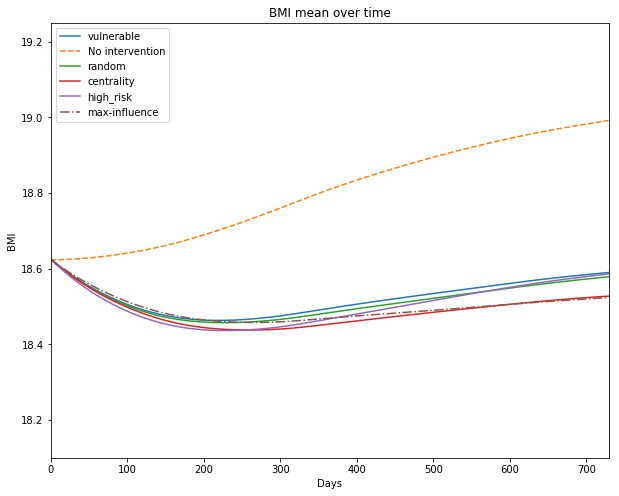

In [17]:
BMI_df.plot(figsize=(10,8), style=styles)
plt.legend()
plt.title('BMI mean over time')
plt.xlabel('Days')
plt.ylabel('BMI')
plt.ylim(18.1,19.25)
plt.xlim(0,729)

(0, 729)

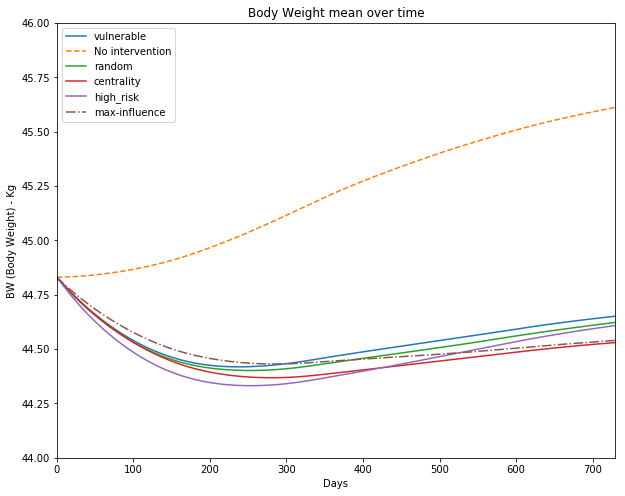

In [18]:
BW_df.plot(figsize=(10,8), style=styles)
plt.legend()
plt.title('Body Weight mean over time')
plt.xlabel('Days')
plt.ylabel('BW (Body Weight) - Kg')
plt.ylim(44,46)
plt.xlim(0,729)

In [19]:
PA_dict = {}
EI_dict = {}
graphs = sorted(nx.weakly_connected_component_subgraphs(G), key=len, reverse=True)
for i in range(len(graphs)):
    diffuse_behavior(graph=graphs[i], intervention=None, years=2)
    results_dict = dict(graphs[i].nodes(data=True))
    for k, v in results_dict.items():
        PA_dict[k] = results_dict[k]['PA_hist']
    for k, v in results_dict.items():
        EI_dict[k] = results_dict[k]['EI_hist']

Simulation without interventions.
Cluster contains 28 nodes and 484 edges!
Simulation without interventions.
Cluster contains 25 nodes and 183 edges!
Simulation without interventions.
Cluster contains 21 nodes and 136 edges!
Simulation without interventions.
Cluster contains 20 nodes and 112 edges!
Simulation without interventions.
Cluster contains 20 nodes and 221 edges!
Simulation without interventions.
Cluster contains 20 nodes and 162 edges!
Simulation without interventions.
Cluster contains 19 nodes and 164 edges!
Simulation without interventions.
Cluster contains 19 nodes and 132 edges!
Simulation without interventions.
Cluster contains 18 nodes and 138 edges!
Simulation without interventions.
Cluster contains 18 nodes and 163 edges!
Simulation without interventions.
Cluster contains 18 nodes and 161 edges!
Simulation without interventions.
Cluster contains 18 nodes and 152 edges!
Simulation without interventions.
Cluster contains 18 nodes and 76 edges!
Simulation without interve

In [20]:
#pd.DataFrame(EI_dict).T.mean()

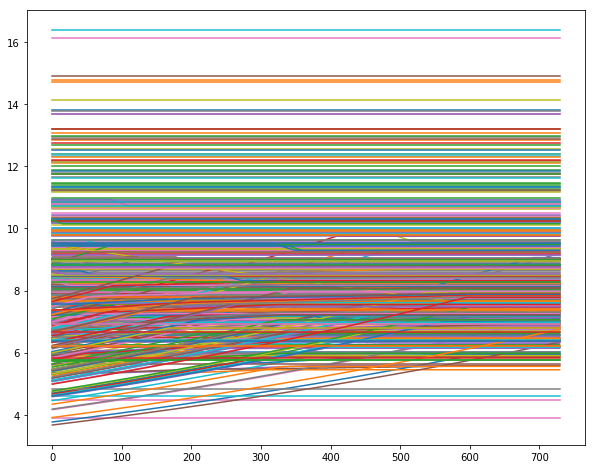

In [21]:
pd.DataFrame(EI_dict).plot(figsize=((10,8)))
plt.legend().set_visible(False)

In [22]:
error

NameError: name 'error' is not defined

In [ ]:
plt.figure(figsize=(12,8))
for node in GS.nodes():
    plt.plot(GS.nodes()[node]['BMI_hist'])

In [ ]:
plt.figure(figsize=(12,8))
for node in GS.nodes():
    plt.plot(GS.nodes()[node]['EI_hist'])

In [ ]:
plt.figure(figsize=(12,8))
for node in GS.nodes():
    plt.plot(GS.nodes()[node]['BW_hist'])

In [ ]:
age_mean = []
for node in GS.nodes():
    age_mean.append(GS.nodes()[node]['age'])

In [ ]:
np.mean(age_mean)